# Group Project: forecasting model:linear regression
## Name: Cindy
### Date: 04/01/2024

In [9]:
# Variables in order:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft. #categorical 
# INDUS    proportion of non-retail business acres per town categorical
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) #missing value- categorical
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
#source website:
#1: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
#2: https://lib.stat.cmu.edu/datasets/boston

In [7]:
import pandas as pd
import requests

# Define the URL of the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Fetch the raw text content of the dataset
response = requests.get(data_url) #read it as text
data_lines = response.text.splitlines() #split the lines

# Initialize empty list to store rows
rows = []

# Iterate through data lines in steps of 2
for i in range(22, len(data_lines), 2):
    # Split line by whitespace
    line_values1 = data_lines[i].split() #split the 1st row for first 11 columns
    line_values2 = data_lines[i+1].split() #split the 2nd row for 12,13,14th columns
    
    # Combine two lines into one row
    combined_values = line_values1 + line_values2 #merge the whole 14 columns together (1st and 2nd rows) together

    # Append the combined values as a new row
    rows.append(combined_values) #added the new combined columns as a new added line in the last line

# Create DataFrame
raw_df = pd.DataFrame(rows, columns=column_names)

# Display the loaded DataFrame
print(raw_df)

        CRIM     ZN   INDUS CHAS     NOX      RM    AGE     DIS RAD    TAX  \
0    0.00632  18.00   2.310    0  0.5380  6.5750  65.20  4.0900   1  296.0   
1    0.02731   0.00   7.070    0  0.4690  6.4210  78.90  4.9671   2  242.0   
2    0.02729   0.00   7.070    0  0.4690  7.1850  61.10  4.9671   2  242.0   
3    0.03237   0.00   2.180    0  0.4580  6.9980  45.80  6.0622   3  222.0   
4    0.06905   0.00   2.180    0  0.4580  7.1470  54.20  6.0622   3  222.0   
..       ...    ...     ...  ...     ...     ...    ...     ...  ..    ...   
501  0.06263   0.00  11.930    0  0.5730  6.5930  69.10  2.4786   1  273.0   
502  0.04527   0.00  11.930    0  0.5730  6.1200  76.70  2.2875   1  273.0   
503  0.06076   0.00  11.930    0  0.5730  6.9760  91.00  2.1675   1  273.0   
504  0.10959   0.00  11.930    0  0.5730  6.7940  89.30  2.3889   1  273.0   
505  0.04741   0.00  11.930    0  0.5730  6.0300  80.80  2.5050   1  273.0   

    PTRATIO       B LSTAT   MEDV  
0     15.30  396.90  4.98  2

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [ ]:
#Change the type from object to float 

In [ ]:
#feature 1: crime

In [19]:
raw_df['CRIM']= raw_df['CRIM'].astype(float)

In [20]:
raw_df.describe()

,CRIM
count,506.000000
mean,3.613524
std,8.601545
min,0.006320
25%,0.082045
50%,0.256510
75%,3.677083
max,88.976200


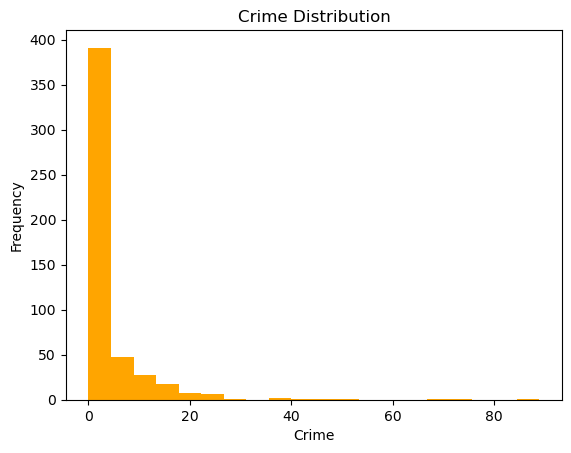

In [23]:
#distribution
import matplotlib.pyplot as plt
plt.hist(raw_df['CRIM'], bins=20, color='orange')
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.title('Crime Distribution')
plt.show()

In [24]:
#feature 2:Zone-  proportion of residential land zoned for lots over 25,000 sq.ft.

In [26]:
raw_df['ZN']=raw_df['ZN'].astype('category')

In [28]:
raw_df.describe()

,CRIM
count,506.000000
mean,3.613524
std,8.601545
min,0.006320
25%,0.082045
50%,0.256510
75%,3.677083
max,88.976200


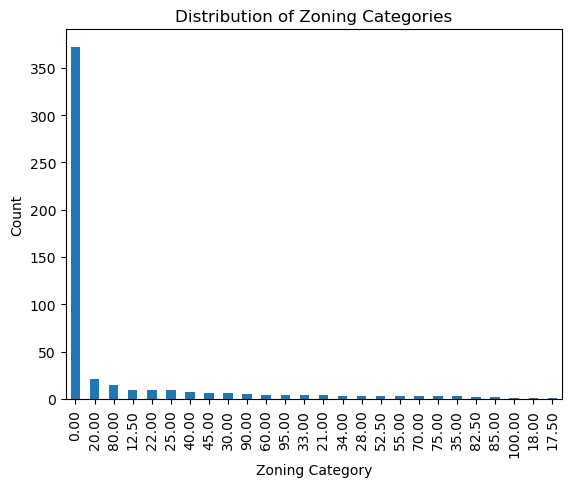

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with a column named 'ZN' (replace with actual names)
raw_df['ZN'].value_counts().plot(kind='bar')  # Plot value counts as a bar chart
plt.xlabel('Zoning Category')
plt.ylabel('Count')
plt.title('Distribution of Zoning Categories')
plt.show()

In [ ]:
#feature 3: INDUS-proportion of non-retail business acres per town categorical


In [30]:
raw_df['INDUS']=raw_df['INDUS'].astype('float')

In [31]:
raw_df.describe()

,CRIM,INDUS
count,506.000000,506.000000
mean,3.613524,11.136779
std,8.601545,6.860353
min,0.006320,0.460000
25%,0.082045,5.190000
50%,0.256510,9.690000
75%,3.677083,18.100000
max,88.976200,27.740000


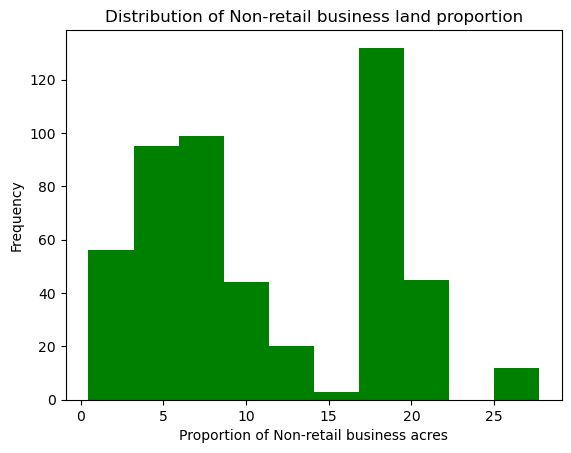

In [35]:
plt.hist(raw_df['INDUS'], color='green')
plt.xlabel('Proportion of Non-retail business acres')
plt.ylabel('Frequency')
plt.title('Distribution of Non-retail business land proportion')
plt.show()

In [ ]:
#feature 4: # CHAS-Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) #missing value- categorical


In [ ]:
#i can use linear regression as forecasting- as for my research lr is the most popular 

In [ ]:
#forecasting real estate, real estate engineer, talk about notebook , interpretation in the notebook, forecasting notebook as an example

In [ ]:
#asking for one model as forecasting - mention ARIMA model as my next step 

In [ ]:
#give one example of popular model-the best model they use, the matrix they model 